<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Notebook 05: JuliaOpt - Julia optimization libraries - statement</font></p>
</p></br>
</p>
</CENTER>

---------------------------

# <span style="color:#00B8DE"> I - Symbolic computation for optimization with Sympy</span>

Sympy is a Python library for symbolic computation that can be interfaced simply with Julia. It can be used when possible to get closed form solution of optimization problems. Inside Julia, additional Julia syntaxes can be used to work with Sympy.

## Refs:

> - https://www.sympy.org/ (sympy website)
> - https://github.com/JuliaPy/SymPy.jl (SymPy Julia interface)
> - http://mth229.github.io/symbolic.html (tuto)
> - https://github.com/jverzani/SymPy.jl/blob/master/examples/tutorial.md (tuto)


In [1]:
using Pkg
Pkg.add("SymPy")
Pkg.build("SpecialFunctions")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
  Building SpecialFunctions → `~/.julia/packages/SpecialFunctions/ne2iw/deps/build.log`


false

## <span style="color:#00B8DE"> a) - Example </span>

In [9]:
using SymPy
#using LaTeXStrings

@vars z
solve((2z^2+z+5)')

2-element Array{Sym,1}:
 -1/4 - sqrt(39)*I/4
 -1/4 + sqrt(39)*I/4

In [10]:
diff(z^4+z^2+6z,z)

   3          
4⋅z  + 2⋅z + 6

In [11]:
a = symbols("a",positive=true)
b = symbols("b",negative=true)
diff(abs(a)),diff(abs(b))

(1, -1)

## <span style="color:#00B8DE"> b) - Constrained optimization: equality constraint </span>

Using Sympy solve 

$$
\left\{
\begin{array}{l}
{\text{opt}}_{x,y}\; f(x,y) = xy \\
{\text {s.t.}}\; h(x,y) = \left(\dfrac x a \right)^2 + \left(\dfrac y b \right)^2-1=0
\end{array}
\right.
$$

In [104]:
import SymPy
# Parameters & functions
@vars x y
a,b    = symbols("a b", positive=true)
λ      = symbols("λ",real=true)
f(x,y) = x*y
h(x,y) = x^2/a^2 + y^2/b^2 - 1
# Solution
L(x,y) = f(x,y) + λ * h(x,y)
∇L(x,y) = [diff(L(x,y),x), diff(L(x,y),y),h(x,y)]
solve(∇L(x,y),(x,y,λ))

4-element Array{Tuple{Sym,Sym,Sym},1}:
 (-sqrt(2)*a/2, -sqrt(2)*b/2, -a*b/2)
 (-sqrt(2)*a/2, sqrt(2)*b/2, a*b/2)  
 (sqrt(2)*a/2, -sqrt(2)*b/2, a*b/2)  
 (sqrt(2)*a/2, sqrt(2)*b/2, -a*b/2)  

## <span style="color:#00B8DE"> c) - Constrained optimization: inequality constraint </span>

Using Sympy solve 

$$
\left\{
\begin{array}{l}
{\text{opt}}_{x,y}\; f(x,y) = xy \\
{\text {s.t.}}\; g_1(x,y) = (\frac x a)^2 + (\frac y b)^2\leq 1;\quad g_2(x,y) = -bx-ay+ab \leq 0
\end{array}
\right.
$$

In [13]:
import SymPy
# Parameters & functions
@vars x y
a,b    = symbols("a b", positive=true)
λ1,λ2    = symbols("λ1 λ2",real=true)
f(x,y) = x*y
g1(x,y) = x^2/a^2 + y^2/b^2 - 1
g2(x,y) = -b*x -a*y +a*b
# Solution
L(x,y) = f(x,y) + λ1 * g1(x,y) + λ2 * g2(x,y)
∇L(x,y) = [diff(L(x,y),x), diff(L(x,y),y), λ1*g1(x,y), λ2*g2(x,y)]
solve(∇L(x,y),(x,y,λ1,λ2))

8-element Array{NTuple{4,Sym},1}:
 (0, 0, 0, 0)                           
 (0, b, a*b/2, 1)                       
 (a/2, b/2, 0, 1/2)                     
 (a, 0, a*b/2, 1)                       
 (-sqrt(2)*a/2, -sqrt(2)*b/2, -a*b/2, 0)
 (-sqrt(2)*a/2, sqrt(2)*b/2, a*b/2, 0)  
 (sqrt(2)*a/2, -sqrt(2)*b/2, a*b/2, 0)  
 (sqrt(2)*a/2, sqrt(2)*b/2, -a*b/2, 0)  

# <span style="color:#00B8DE"> II - Using JuliaOpt</span>

If high performance numerical optimization is searched for optimization, one can look at **JuliaOpt** (http://www.juliaopt.org/), an organization that brings together packages related to optimization. In particular it supplies

> - Julia standalone packages such as **Optim.jl** or **Convex.jl**
> - modeling languages
> - external solver interfaces
<!-- >![alt text](./optim_overview.png) -->

#### *Note:* **MathProgBase** library is an API (Application Programming Interface) for mathematical optimization solvers that has been replaced recently by **MathOptInterface**


## Refs:

> - https://www.juliaopt.org/ (JuliaOpt)
> - http://www.juliaopt.org/packages/ (JuliaOpt packages list)
> - https://github.com/JuliaOpt/Convex.jl (Convex)
> - https://convexjl.readthedocs.io/en/latest/
> - http://www.juliaopt.org/JuMP.jl/v0.19.0/ (JuMP)
> - https://github.com/JuliaOpt/MathOptInterface.jl (MathOptInterface)

## <span style="color:#00B8DE"> a) Minimizing Rosenborck's function with Optim.jl</span>

**Optim.jl**: a project to implement basic optimization algorithms in pure Julia for univariate and multivariate optimization.


https://github.com/JuliaNLSolvers/Optim.jl

Minimize Rosenbrock's $f({\bf x})=\sum_{i=1:n-1}[(1-{\bf x}_i)^2+100(x_{i+1}-x_i^2)^2]$ with library **Optim.jl**
using the conjugate gradient method. 
> - First let the algorithm compute the gradient by itself. Compare several optimization methods.
> - Then, call the optimization function supplying the gradient function. 
> - Compare execution time

Choose for instance $n=10$.

In [191]:
using Pkg
Pkg.add("Optim")

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [192]:
function rosenbrock(x)
    
    out = 0
    
    N = length(x)
    
    for i in 1:N-1
            
        out += (1.0 - x[i])^2 + 100.0 * (x[i+1] - x[i]^2)^2
    end
    
    return out

end

rosenbrock (generic function with 1 method)

In [193]:
function ∇_Ros!(∇,x)
    
    N = length(x)
    
    ∇[1] = -2.0 * (1.0 - x[1]) - 400.0 * (x[2] - x[1]^2) * x[1]
    
    for i in 2:N-1
                
        ∇[i] = -2.0 * (1.0 - x[i]) - 400.0 * (x[i+1] - x[i]^2) * x[i] + 200.0 * (x[i] - x[i-1]^2)
        
    end 
    
    ∇[N] = 200.0 * (x[N] - x[N-1]^2)

end

∇_Ros! (generic function with 1 method)

In [194]:
function rosenbrock10(x)
    
    N = 10
    
    out = 0
    
    for i in 1:N-1
                    
        out += (1.0 - x[i])^2 + 100.0 * (x[i+1] - x[i]^2)^2
    end
    
    return out

end

rosenbrock10 (generic function with 1 method)

In [195]:
function ∇_Ros10!(∇,x)
    
    N = 10
    
    ∇[1] = -2.0 * (1.0 - x[1]) - 400.0 * (x[2] - x[1]^2) * x[1]
    
    for i in 2:N-1
                
        ∇[i] = -2.0 * (1.0 - x[i]) - 400.0 * (x[i+1] - x[i]^2) * x[i] + 200.0 * (x[i] - x[i-1]^2)
        
    end 
    
    ∇[N] = 200.0 * (x[N] - x[N-1]^2)

end

∇_Ros10! (generic function with 1 method)

In [196]:
@vars x1 x2 x3 x4
rosenbrock([x1,x2,x3,x4])

                                 2                                    2       
           2         ⎛    2     ⎞               2         ⎛    2     ⎞        
(-x₁ + 1.0)  + 100.0⋅⎝- x₁  + x₂⎠  + (-x₂ + 1.0)  + 100.0⋅⎝- x₂  + x₃⎠  + (-x₃

                             2
       2         ⎛    2     ⎞ 
 + 1.0)  + 100.0⋅⎝- x₃  + x₄⎠ 

## Conjugate Gradient

In [208]:
using Optim
N = 10

@time result = optimize(rosenbrock, zeros(N), ConjugateGradient())

  0.000863 seconds (4.59 k allocations: 167.547 KiB)


 * Status: success

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00, 1.00e+00,  ...]
    Minimum:   1.812227e-16

 * Found with
    Algorithm:     Conjugate Gradient
    Initial Point: [0.00e+00, 0.00e+00, 0.00e+00,  ...]

 * Convergence measures
    |x - x'|               = 2.09e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.09e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.63e-18 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 9.00e-03 ≰ 0.0e+00
    |g(x)|                 = 7.52e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    194
    f(x) calls:    405
    ∇f(x) calls:   212


In [209]:
@time optimize(rosenbrock, ∇_Ros!, zeros(N), ConjugateGradient())

  0.000299 seconds (4.26 k allocations: 153.063 KiB)


 * Status: success

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00, 1.00e+00,  ...]
    Minimum:   2.369349e-17

 * Found with
    Algorithm:     Conjugate Gradient
    Initial Point: [0.00e+00, 0.00e+00, 0.00e+00,  ...]

 * Convergence measures
    |x - x'|               = 1.92e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.92e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.19e-19 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 9.24e-03 ≰ 0.0e+00
    |g(x)|                 = 4.47e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    175
    f(x) calls:    354
    ∇f(x) calls:   180


## BFGS

In [210]:
using Optim

@time result = optimize(rosenbrock10, zeros(N), BFGS())

  0.000247 seconds (1.44 k allocations: 60.328 KiB)


 * Status: success

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00, 1.00e+00,  ...]
    Minimum:   1.617061e-16

 * Found with
    Algorithm:     BFGS
    Initial Point: [0.00e+00, 0.00e+00, 0.00e+00,  ...]

 * Convergence measures
    |x - x'|               = 4.66e-09 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.66e-09 ≰ 0.0e+00
    |f(x) - f(x')|         = 9.67e-17 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.98e-01 ≰ 0.0e+00
    |g(x)|                 = 5.52e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    65
    f(x) calls:    159
    ∇f(x) calls:   159


In [211]:
@time optimize(rosenbrock10, ∇_Ros10!, zeros(N), BFGS())

  0.000189 seconds (1.45 k allocations: 60.375 KiB)


 * Status: success

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00, 1.00e+00,  ...]
    Minimum:   7.443667e-25

 * Found with
    Algorithm:     BFGS
    Initial Point: [0.00e+00, 0.00e+00, 0.00e+00,  ...]

 * Convergence measures
    |x - x'|               = 4.59e-10 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.59e-10 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.42e-19 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.63e+05 ≰ 0.0e+00
    |g(x)|                 = 1.95e-11 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    65
    f(x) calls:    160
    ∇f(x) calls:   160


## Gradient Descent

In [212]:
@time result = optimize(rosenbrock10, zeros(N), GradientDescent())

  0.002580 seconds (21.55 k allocations: 825.047 KiB)


 * Status: failure (reached maximum number of iterations) (line search failed)

 * Candidate solution
    Minimizer: [9.97e-01, 9.94e-01, 9.89e-01,  ...]
    Minimum:   3.899416e-01

 * Found with
    Algorithm:     Gradient Descent
    Initial Point: [0.00e+00, 0.00e+00, 0.00e+00,  ...]

 * Convergence measures
    |x - x'|               = 7.29e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.31e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.19e-03 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.06e-03 ≰ 0.0e+00
    |g(x)|                 = 5.96e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2502
    ∇f(x) calls:   2502


In [213]:
@time optimize(rosenbrock10, ∇_Ros10!, zeros(N), GradientDescent())

  0.001804 seconds (21.55 k allocations: 824.984 KiB)


 * Status: failure (reached maximum number of iterations) (line search failed)

 * Candidate solution
    Minimizer: [9.97e-01, 9.94e-01, 9.89e-01,  ...]
    Minimum:   3.899416e-01

 * Found with
    Algorithm:     Gradient Descent
    Initial Point: [0.00e+00, 0.00e+00, 0.00e+00,  ...]

 * Convergence measures
    |x - x'|               = 7.29e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.31e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.19e-03 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.06e-03 ≰ 0.0e+00
    |g(x)|                 = 5.96e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2502
    ∇f(x) calls:   2502


For the three methods used, we can see that when we supply the gradient the convergence is faster.

## <span style="color:#00B8DE"> b) Linear and quadratic problems with Convex.jl</span>

**Convex.jl**: A Julia library for solving linear and convex problems via disciplined convex optimization (see the first slides of http://stanford.edu/~boyd/papers/pdf/dcp_talk.pdf for an introduction to the subject)

<!-- 
Examples: https://nbviewer.jupyter.org/github/JuliaOpt/Convex.jl/blob/master/examples/basic_usage.ipynb

https://convexjl.readthedocs.io/en/latest/quick_tutorial.html 
-->

In [109]:
import Pkg
Pkg.add("Convex") 
Pkg.add("ECOS") # a lightweight LQ (linear and quadratic) and conic solver 

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


#### <span style="color:#00B8DE"> Examples: linear programming</span>

In [110]:
using Convex
using ECOS

x = Variable()
y = Variable()
z = Variable()
expr = x + y + z
    problem = minimize(expr, x >= 1, y >= x, 4 * z >= y)
solve!(problem, ECOSSolver(verbose=0))
println("problem status = $(problem.status)")
println("[x, y, z]= $([round.(a.value; digits=2) for a in (x, y, z)])")

problem status = Optimal
[x, y, z]= [1.0, 1.0, 0.25]


In [111]:
using LinearAlgebra: Diagonal

x = Variable(4)
c = [1; 2; 3; 4]
A = Diagonal(ones(4))
b = [10; 10; 10; 10]
p = Convex.maximize(dot(c, x)) # or c' * x
p.constraints += A * x <= b
p.constraints += [x >=0 ; x <= 10; x[2] <= 5; x[1] + x[4] - x[2] <= 6.5]
Convex.solve!(p, ECOSSolver(verbose=0))

println("problem status = $(p.status)")
println("objective = $(round(p.optval; digits=2))")
println("x_opt = $(round.(x.value; digits=2))")
println("x[1] + x[4] - x[2] = $(round.(evaluate(x[1] + x[4] - x[2])))")

problem status = Optimal
objective = 81.5
x_opt = [1.5; 5.0; 10.0; 10.0]
x[1] + x[4] - x[2] = [6.0]


#### <span style="color:#00B8DE"> Exercise: constrained minimum squared error</span>

> - Write and test a function to solve 
$$
\min \parallel{\bf Ax}-{\bf b}\parallel\; s.t.\; {\bf x}\succeq 0.
$$

In [114]:
function MSE(A,b)
    # Minimize ||Ax - b||^2 subject to x >= 0
    x = Variable(size(A)[2])
    v = A * x - b
    p = Convex.minimize(sumsquares(v))
    p.constraints += [x>=0]
    Convex.solve!(p, ECOSSolver(verbose=0))
    
    println("problem status = $(p.status)")
    println("objective = $(round(p.optval; digits=2))")
    println("x_opt = $(round.(x.value; digits=2))")
end
    
# Generate random problem data
m = 3;  n = 5
A = randn(m, n); b = randn(m, 1)
MSE(A,b)

problem status = Optimal
objective = -0.0
x_opt = [0.41; 0.42; 3.2; 4.38; 6.47]


## <span style="color:#00B8DE"> c) Using JuMP.jl</span>

We will look at **JuMP** modeling language and use it with several optimization solvers.

**Notes** 
> - The API **MathProgBase** is being deprecated and replaced by **MathOptInterface**
> - Some packages need installation of additional libraries, possibly as a super-user (see system administrator)


In [18]:
using Pkg
Pkg.add("JuMP")

 Resolving package versions...
 Installed JuMP ─ v0.20.1
  Updating `~/.julia/environments/v1.2/Project.toml`
  [4076af6c] + JuMP v0.20.1
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [4076af6c] + JuMP v0.20.1


In [44]:
#Pkg.add("Cbc")      # LQ (linear and quadratic) programming
#Pkg.add("Clp")      # LQ programming
#Pkg.add("SCS")      # popular for cone programming
#Pkg.add("Pajarito") # MICP (mixed integer constraint)
Pkg.add("Ipopt")    # Interior Point Optimizer 
#Pkg.add("NLopt")    # nonlinear optimization
#Pkg.add("GLPK")     # GNU Linear Programming Kit

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


#### <span style="color:#00B8DE"> Example 1: linear program</span>

In [7]:
# https://github.com/JuliaOpt/JuMP.jl/blob/master/examples/basic.jl
using JuMP, GLPK, Test
"""
example_basic([verbose = true])
Formulate and solve a simple LP:
    max 5x + 3y
     st 1x + 5y <= 3
         0 <= x <= 2
         0 <= y <= 30
If `verbose = true`, print the model and the solution.
"""
function example_basic(verbose=true)
    model = Model(with_optimizer(GLPK.Optimizer))
    @variable(model, 0 <= x <= 2)
    @variable(model, 0 <= y <= 30)
    @objective(model, Max, 5x + 3y)
    @constraint(model, 1x + 5y <= 3.0)

    #set_silent(model)
    if verbose
        print(model)
    end

    optimize!(model)
    if verbose
        println("\nObjective value: $(objective_value(model))")
        println("x = $(value(x))")
        println("y = $(value(y))")
    end

    @test objective_value(model) ≈ 10.6
    @test value(x) ≈ 2
    @test value(y) ≈ 0.2
end

verbose = true
example_basic(verbose)

Max 5 x + 3 y
Subject to
 x + 5 y ≤ 3.0
 x ≥ 0.0
 y ≥ 0.0
 x ≤ 2.0
 y ≤ 30.0

Objective value: 10.6
x = 2.0
y = 0.2


Test Passed

x+5y=3, x=2, 5+μ+ν=0, 3+5μ=0 ⇒ x,y,μ,ν=2,0.2,-2/3,-13/3
μ and ν are negative (maximization problem) and other multipliers set to 0, Khun&Tucker conditions are satisfied and problem is convex. Hence we got the true solution

#### <span style="color:#00B8DE"> Example 2: quadratic objective</span>

In [9]:
using JuMP
using Ipopt

function example_quadratic(verbose = true)
    m = Model(with_optimizer(Ipopt.Optimizer,print_level=0))
    @variable(m, 0 <= x <= 2 )
    @variable(m, 0 <= y <= 30 )
    @objective(m, Min, x*x+ 2x*y + y*y)
    @constraint(m, x + y >= 1 )
 
    if verbose
        print(m)
    end

    set_silent(m)
    optimize!(m)
    if verbose
        println("\nObjective value: $(round(objective_value(m);digits=2))")
        println("x = $(round(value(x);digits=2))")
        println("y = $(round(value(y);digits=2))")
    end
end

example_quadratic()

Min x² + 2 x*y + y²
Subject to
 x + y ≥ 1.0
 x ≥ 0.0
 y ≥ 0.0
 x ≤ 2.0
 y ≤ 30.0

Objective value: 1.0
x = 0.28
y = 0.72


#### <span style="color:#00B8DE"> Example 3: conic constraints</span>

Let $x\in\mathbb{R}^{n+1}, A\in\mathbb{R}^{n\times n}, b\in\mathbb{R}^{n}$. Solve 
$$
\left\{
\begin{array}{l}
\min_{x} \parallel x-u\parallel \\
{\text {s.t.}}\; \parallel Ax_{1:n}-b\parallel \leq x_{n+1};\;x\geq 0
\end{array}
\right.
$$

In [19]:
using JuMP, ECOS, LinearAlgebra

function example_quadratic(n; verbose = true)
    A = randn(n,n)
    b = randn(n)
    u = randn(n)

    m = Model(with_optimizer(ECOS.Optimizer))
    @variable(m, x[i=1:n+1]>=0)
    ##########################
    @variable(m, t)
    @objective(m, Min, t)
    @constraint(m, vcat(t, (x[1:n]-u)) in SecondOrderCone())
    ##########################
    # Know also works with
    # @objective(m, Min, (x[1:n]-u)'*(x[1:n]-u))
    u = vcat(x[n+1],(A*x[1:n]-b))
    @constraint(m, u in SecondOrderCone())

    print(m)

    std = stdout # save original stdout stream
    redirect_stdout()
    JuMP.optimize!(m)
    redirect_stdout(std) # restore stdout

    println("\nObjective value: $(round.(JuMP.objective_value(m);digits=2))")
    println("x = $(round.([JuMP.value(x[k]) for k=1:n];digits=2))")
    println("t = $(round.(JuMP.value(t);digits=2))")
end

example_quadratic(4)

Min t
Subject to
 [t, x[1] + 0.7578265483823386, x[2] - 1.6942749358728655, x[3] + 0.3647477869287509, x[4] + 0.8116409533402457] ∈ MathOptInterface.SecondOrderCone(5)
 [x[5], -1.6521932946195572 x[1] + 0.024564448652553663 x[2] - 1.2848319227679927 x[3] + 0.7012862533187282 x[4] - 0.04192602599590368, 0.35980972389649585 x[1] + 0.16138616997464175 x[2] + 2.209078607235978 x[3] + 1.5231578909391517 x[4] - 0.17021383104017934, 0.1536682840079363 x[1] - 0.5138685986002539 x[2] + 1.709832263155149 x[3] - 0.5035558348292005 x[4] + 0.005390792338667495, -1.6182771305345947 x[1] + 2.986915687340239 x[2] + 1.136839087446193 x[3] - 0.8846924643721332 x[4] - 0.9638425277646077] ∈ MathOptInterface.SecondOrderCone(5)
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 x[4] ≥ 0.0
 x[5] ≥ 0.0

Objective value: 1.17
x = [0.0, 1.69, 0.0, 0.0]
t = 1.17


┌ Info: Precompiling JuMP [4076af6c-e467-56ae-b986-b466b2749572]
└ @ Base loading.jl:1242


#### <span style="color:#00B8DE"> Exercise 1: nonlinear optimization</span>

Using **Ipopt** solver, solve

$$
\max_{x,y} xy^2\\
{\text {s.t.}}\; x^3+y^2= 1;\;x\geq 0;\;y\geq 0
$$

Compare the result obtained with the theoretical solution


In [4]:
using JuMP, Ipopt

function excercise_one(verbose = true)

    m = Model(with_optimizer(Ipopt.Optimizer))
    @variable(m, x>=0)
    @variable(m, y>=0)
    @NLobjective(m, Max, x*y^2)
    @NLconstraint(m,x^3+y^2==1.0)

    print(m)
    
    std = stdout # save original stdout stream
    redirect_stdout()
    optimize!(m)
    redirect_stdout(std) # restore stdout
    
    println("\nObjective value: $(round(objective_value(m);digits=2))")
    println("x = $(value(x))")
    println("y = $(value(y))")
    
    return x,y
    
end

x,y = excercise_one()


Max x * y ^ 2.0
Subject to
 x ≥ 0.0
 y ≥ 0.0
 (x ^ 3.0 + y ^ 2.0) - 1.0 = 0

Objective value: 0.47
x = 0.6299605253670073
y = 0.8660254034964514


(x, y)

In [5]:
# s = print("\U221B")
print("Error evaluation: [εx,εy] = ")
print("[", JuMP.value(x)-1/∛4,", ", JuMP.value(y)-√3/2,"]" )

Error evaluation: [εx,εy] = [4.1957082252963573e-10, -2.879871896510622e-10]

#### <span style="color:#00B8DE"> Exercise 2: nonlinear optimization (SISEA Master, June 2016)</span>

Using **Ipopt** solver, solve
$$
{\text {solve}}\; \min_{x,y} x-y^2\\
{\text {s.t.}}\; x^2+y^2\leq 1
$$

Compare the result obtained with the theoretical solution

In [144]:
using JuMP, Ipopt

function excercise_two(verbose = true)

    m = Model(with_optimizer(Ipopt.Optimizer))
    @variable(m, x>=0)
    @variable(m, y>=0)
    @NLobjective(m, Min, x-y^2)
    @NLconstraint(m,x^3+y^2<=1.0)

    print(m)
    
    std = stdout # save original stdout stream
    redirect_stdout()
    optimize!(m)
    redirect_stdout(std) # restore stdout
    
    println("\nObjective value: $(round(objective_value(m);digits=2))")
    println("x = $(value(x))")
    println("y = $(value(y))")
    
    return x,y
    
end

x,y = excercise_two()

Min x - y ^ 2.0
Subject to
 x ≥ 0.0
 y ≥ 0.0
 (x ^ 3.0 + y ^ 2.0) - 1.0 ≤ 0

Objective value: -1.0
x = 0.0
y = 1.0000000037466314


(x, y)

#### <span style="color:#00B8DE"> Exercise 3: constrained maximum likelihood estimation</span>

> - Implement the maximum likelihood estimation of mean $\mu$ and variance $\sigma^2$ for Gaussian $\mathcal{N}(0,1)$ sample
> - Implement the same problem under additional constraint $\mu=\sigma^2$

In [190]:
#https://github.com/JuliaOpt/JuMP.jl/blob/master/examples/mle.jl

using JuMP, Ipopt, Random, Statistics, Test

"""
    example_mle()
Use nonlinear optimization to compute the maximum likelihood estimate (MLE) of
the parameters of a normal distribution aka the sample mean and variance
"""

function example_mle(N; verbose = true)
                
    x = randn(N)
            
    model = Model(with_optimizer(Ipopt.Optimizer))
    @variable(model, μ>=0)
    @variable(model, σ>=0)
    @NLobjective(model, Max, N / 2 * log(1 / (2 * π * σ^2)) - sum((xi - μ)^2 for xi in x) / (2 * σ^2))

    #print(model)
    
    std = stdout # save original stdout stream
    redirect_stdout()
    optimize!(model)
    redirect_stdout(std) # restore stdout
    
    println("Without constraint")
    println("\nObjective value: $(round(objective_value(model);digits=2))")
    println("μ = $(value(μ))")
    println("σ = $(value(σ))")
    println("")
    
    #return μ,σ
                
    @NLconstraint(model, μ == σ)
    optimize!(model)
                
    println("With the constraint  μ = σ ")
    println("\nObjective value: $(round(objective_value(model);digits=2))")
    println("μ = $(value(μ))")
    println("σ = $(value(σ))")
     
end

example_mle(1000)

Without constraint

Objective value: -1393.36
μ = 0.010615355246404532
σ = 0.9747453518972121

With the constraint  μ = σ 

Objective value: -1882.5
μ = 0.9695099250475486
σ = 0.9695099250475486


#### <span style="color:#00B8DE"> Exercise 4: shape of a chain hang at both ends (catenary)</span>

We want to compute the shape of a chain with endpoints $P_1=(0,1)$ and $P_2=(1,1.5)$. We assume the chain has $N\_links = 10$ linear links, each with length $L\_links = 2/N\_links$. Compute the positions of the endpoints of the links and plot them.

In [240]:
using JuMP

N_links = 20          # number of links
N_ends  = N_links+1   # number of ends of links
L_links = 2/N_links   # length of links


model = Model(with_optimizer(Ipopt.Optimizer))

@variable(model, x[1:N_ends])
@variable(model, y[1:N_ends])
@constraint(model, x[1] == 0)
@constraint(model, x[N_ends] == 1)
@constraint(model, y[1] == 1)
@constraint(model, y[N_ends] == 1.5)
#@constraint(model, diff(x).^2+diff(y).^2 .==L_links^2)
for i in 1:N_links
    @NLconstraint(model, (x[i+1]-x[i])^2+(y[i+1]-y[i])^2 == L_links^2)
end

@NLobjective(model, Min, sum(y[i] for i in 1:N_links))

            
#print(model)
            
optimize!(model)
            
sol_x = round.([JuMP.value(x[k]) for k=1:N_ends];digits=2)
sol_y = round.([JuMP.value(y[k]) for k=1:N_ends];digits=2)


println("\nObjective value: $(round.(JuMP.objective_value(model);digits=2))")
println("x = $(round.([JuMP.value(x[k]) for k=1:N_ends];digits=2))")
println("y = $(round.([JuMP.value(y[k]) for k=1:N_ends];digits=2))")


Objective value: 16.29
x = [-0.0, 0.03, 0.07, 0.11, 0.16, 0.23, 0.3, 0.4, 0.5, 0.59, 0.66, 0.72, 0.77, 0.82, 0.85, 0.88, 0.91, 0.94, 0.96, 0.98, 1.0]
y = [1.0, 0.91, 0.81, 0.72, 0.64, 0.56, 0.5, 0.46, 0.46, 0.5, 0.57, 0.65, 0.74, 0.83, 0.92, 1.01, 1.11, 1.21, 1.3, 1.4, 1.5]


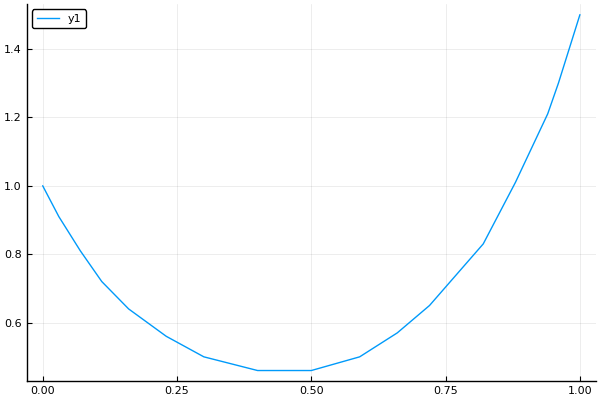

In [241]:
using Plots
pyplot()
plot(sol_x, sol_y)

We can see that by increasing N_ends, the solution gets softer